In [ ]:
# Will be working with the insurance dataset for this notebook
# Goal is to determine (analyze) what causes customers to have higher charges

# 1. Summarize all the information present in the data
# 2. Use pandas to analyze what causes high charges for some customers and low charges for other customers

import pandas as pd
import numpy as np

data = pd.read_csv('insurance.csv', on_bad_lines='skip')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Looking at the structure and data types of the insurance data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# General statistics about numeric attributes of data

data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


From the statistics above, I can see that the dataset is very evenly balanced between sex='male' and sex='female'. There are slightly more males than females although both numbers fall right around 50%. 

I can also see that the dataset includes 1064 non smokers out of 1338 people total (79.5%). This indicates that the data is extremely biased towards non smokers. Data cleaning might be required to increase the data points for smokers or decrease the data points for non smokers. 


In [ ]:
# Displaying correlation between numeric data points

data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
# Here I will display the average charges relative to each variable

# Average charges for the different Ages
print(data.groupby('age')['charges'].mean())

# Average charges for the different sexes
print(data.groupby('sex')['charges'].mean())

# Average charges for the different BMI's
print(data.groupby('bmi')['charges'].mean())

# Average charges for different children counts
print(data.groupby('children')['charges'].mean())

# Average charges for different smoker status
print(data.groupby('smoker')['charges'].mean())

# Average charges for different regions
print(data.groupby('region')['charges'].mean())

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: f

Some very simple early observations I can make about the data:

1. Charges appear to be relatively lower for younger people compared to older people.

2. Males have a slightly higher average charge than females.

3. I cannot see a clear correlation between bmi and average charges currently.

4. I can't see any clear indication that the number of children plays a huge role in determining cost. I do think it's interesting that the lowest average cost came with the highest number of children but I need to explore further to determine significance.

5. Charges are SIGNIFICANTLY higher for smokers relative to non smokers

6. Region doesn't appear to have a huge effect on charges although the southeast region does have the highest average charges.


In [ ]:
# Looking at variance for each column

data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [ ]:
# Looking at skew for each column

data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [ ]:
from math import ceil
# Here I will find the top 10% and bottom 10% of charges data points to classify as good & bad

# I start by sorting the data by Charge with the highest charges first
sorted_data = data.sort_values('charges', ascending=False)

# Next I am finding the top 10% of data for high_data points and bottom 10% for low data points
high_data = sorted_data.head(ceil(len(sorted_data) * .25))
low_data = sorted_data.tail(ceil(len(sorted_data) * .25))
print(high_data)
print(low_data)

      age     sex     bmi  children smoker     region      charges
543    54  female  47.410         0    yes  southeast  63770.42801
1300   45    male  30.360         0    yes  southeast  62592.87309
1230   52    male  34.485         3    yes  northwest  60021.39897
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
...   ...     ...     ...       ...    ...        ...          ...
1274   26    male  27.060         0    yes  southeast  17043.34140
0      19  female  27.900         0    yes  southwest  16884.92400
983    27  female  30.590         1     no  northeast  16796.41194
1100   33  female  19.095         2    yes  northeast  16776.30405
727    29  female  21.755         1    yes  northeast  16657.71745

[335 rows x 7 columns]
      age     sex     bmi  children smoker     region     charges
440    31  female  32.680         1     no  northwest  4738.26820
832    28  female  23.845         2     

In [ ]:
# Showing the general statistics for each dataset (high charges and low charges)

print(high_data.describe(include='all'))

print(low_data.describe(include='all'))

               age   sex         bmi    children smoker     region  \
count   335.000000   335  335.000000  335.000000    335        335   
unique         NaN     2         NaN         NaN      2          4   
top            NaN  male         NaN         NaN    yes  southeast   
freq           NaN   188         NaN         NaN    255        112   
mean     40.188060   NaN   31.308582    1.179104    NaN        NaN   
std      13.817583   NaN    5.843001    1.164924    NaN        NaN   
min      18.000000   NaN   17.765000    0.000000    NaN        NaN   
25%      28.000000   NaN   27.100000    0.000000    NaN        NaN   
50%      42.000000   NaN   30.900000    1.000000    NaN        NaN   
75%      52.000000   NaN   35.530000    2.000000    NaN        NaN   
max      64.000000   NaN   52.580000    5.000000    NaN        NaN   

             charges  
count     335.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    31108.444687  
std     10595.023690 

It is clear to me from the above high and low cost data points that the highest charges come from those people who are smokers and older. The lower charges are coming mainly from people who do not smoke and are young (under 30)

In [ ]:
data[data['smoker'] == 'yes'].describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [ ]:
data[data['smoker'] == 'no'].describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


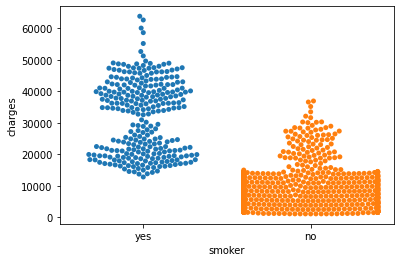

In [ ]:
sns.swarmplot(x='smoker', y='charges', data=data)

I can see above that I am correct in my initial observation that smokers have higher charges than non smokers. The mean cost is 8434 for non smokers and 32050 for smokers. This is a roughly 4x increase in the average charges for smokers compared to non smokers. 

The minimum and maximum charge values between smokers and non smokers shows a similarly significant observation. The minimum and maximum values for non smokers are min=1121 and max=36910. The minimum and maximum values for smokers are min=12829 and max=63770. This is a 10x increase for minimum charges for smokers compared to non smokers as well as a 2x increase for maximum charges compared to non smokers.

This clearly shows that whether a person smokes or not has a very significant impact on the overall cost for their charges. The single most important factor to determining charges for a customer is smoking status.

In [ ]:
data[data['sex'] == 'male'].describe()

,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


In [ ]:
data[data['sex'] == 'female'].describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


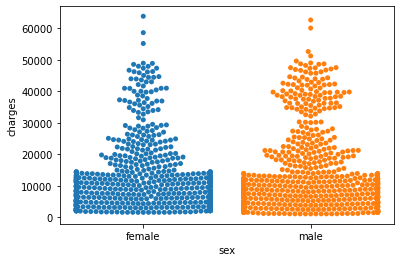

In [ ]:
sns.swarmplot(x='sex', y='charges', data=data)

Between males and females, I can see that the charges don't have a drastic increase or descrease between the two sexes. They have similar minimum and maximum charges as well as quartiles. The main difference I would note is that males have a slightly higher average charge than females (13596 vs 12569). 

I believe this can be explained by looking at the quartiles that data points fall into. When looking at males, I can see that the quartile values are (25%=4619, 50%=9369, and 75%=18989). Looking at females (25%=4885, 50%=9412, and 75%=14454). 

I observe that females have a higher charge for both the 25% and the 50% quartile (although they are similar) but the males have a much higher 75% quartile (18989 vs 14454). 

Looking at the swarmplot above, I can see that males have a higher density of higher charges relative to females while they both have similar lower and medium charge densities. This explains the discrepancy for the 75% quartiles and the average charges between the sexes. Males have a more spread out charge density over the high charges relative to females.

In [ ]:
data[data['bmi'] < 18.5].describe()

,age,bmi,children,charges
count,20.000000,20.000000,20.000000,20.000000
mean,32.350000,17.566250,1.050000,8852.200585
std,13.480102,0.608326,1.276302,7735.038364
min,18.000000,15.960000,0.000000,1621.340200
25%,21.000000,17.290000,0.000000,2751.631438
50%,27.500000,17.575000,1.000000,6759.262475
75%,38.250000,17.978750,2.000000,12923.162737
max,60.000000,18.335000,5.000000,32734.186300


In [ ]:
data[data['bmi'] > 24.9].describe()

,age,bmi,children,charges
count,1096.000000,1096.000000,1096.000000,1096.000000
mean,39.830292,32.538878,1.091241,13936.616823
std,14.063471,4.997633,1.197744,12813.079629
min,18.000000,24.970000,0.000000,1131.506600
25%,27.000000,28.595000,0.000000,4893.564850
50%,40.000000,31.862500,1.000000,9556.297050
75%,52.000000,35.803750,2.000000,17607.411362
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data[data['bmi'].between(18.5,24.9)].describe()

,age,bmi,children,charges
count,222.000000,222.000000,222.000000,222.000000
mean,36.747748,22.584189,1.117117,10379.499732
std,13.652751,1.630495,1.242088,7500.713471
min,18.000000,18.500000,0.000000,1121.873900
25%,25.000000,21.477500,0.000000,4057.701137
50%,35.000000,22.895000,1.000000,8604.153525
75%,47.750000,23.980000,2.000000,15197.264325
max,64.000000,24.890000,5.000000,35069.374520


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; y

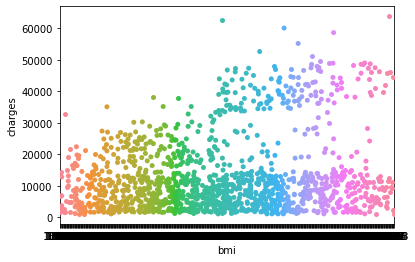

In [ ]:
sns.swarmplot(x='bmi', y='charges', data=data)

My next step was to analyze bmi relative to the charges. I first split the dataset into 3 different categories based on a google search for a normal bmi range(18.5 to 24.9).

From here I directly compare some statistics between the three groups which are lowbmi (<18.5), normalbmi (between 18.5&24.9), and highbmi (>24.9)

I can observe that there are only 20 people in the lowbmi group, 1096 in the normal bmi group, and 222 people in the high bmi group. This is important because it shows how the data is distributed between the bmi ranges. 1096/1338 (~82%) of people fall into the normal bmi range. This is significant because it shows that the vast majority of the dataset has a normal bmi range. 

First, looking at the swarmplot of the bmi relative to charges, I can see that there is a dense group of 'low charges' among all bmi ranges (as seen by the bottom cluster of data points which appears as a line on the plot).
I can also see that all of the highest charges come from people who had a higher bmi. 

Looking at the plot above I can see that with an increase in bmi, there appears to be a correlated increase of charges. This is not a strong correlation, but following the trend line from the plot above you can see that the higher charges are more frequent with people having a higher bmi. 

I will compare mean, min, and max between the three groups of bmi's for this analysis. 
For those with a low bmi (<18.5) the average charge is 8852, the minimum is 1621, and the maximum is 32734.
For those with high bmi (>24.9), the average charge is 13936, minimum is 1131, and maximum is 63770.
For people with a bmi in the normal healthy range (between 18.5 & 24.9) the average charge is 10379, minimum is 1121, and maximum is 35069. 

These values demonstrate an increase in charges as the bmi is increased. The low bmi group had the lowest average charge with 8852, the normal group was next with an average of 10379, and the high group had the most charges with an average of 13936. This shows me an almost linear increase in average charges as bmi is increased. The minimum values in each group are similar and thus don't reveal any new trends. Looking at the maximum values, I can also see that those in the high bmi group have a much higher maximum charge relative to normal or even low bmi (63770 vs 32734 vs 35069).

I can conclude from this analysis that bmi is important to determining charges. Those with a higher bmi are at a much higher risk for high average and maximum costs relative to those with a normal or even low bmi. 

In [ ]:
data[data['age'] <= 39].describe()

,age,bmi,children,charges
count,674.000000,674.000000,674.000000,674.000000
mean,27.048961,30.074941,1.063798,10157.217581
std,6.713118,6.243012,1.228837,11647.688388
min,18.000000,15.960000,0.000000,1121.873900
25%,21.000000,25.800000,0.000000,2719.790013
50%,27.000000,29.805000,1.000000,4749.061450
75%,33.000000,34.103750,2.000000,15743.034337
max,39.000000,53.130000,5.000000,58571.074480


In [ ]:
data[data['age'] > 39].describe()

,age,bmi,children,charges
count,664.000000,664.000000,664.000000,664.000000
mean,51.548193,31.260715,1.126506,16430.512562
std,7.037548,5.892397,1.181413,11754.526040
min,40.000000,18.050000,0.000000,5415.661200
25%,46.000000,26.698750,0.000000,9033.060162
50%,51.000000,31.160000,1.000000,11657.916975
75%,57.000000,35.727500,2.000000,19839.727488
max,64.000000,49.060000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.6% of the points cannot be placed; y

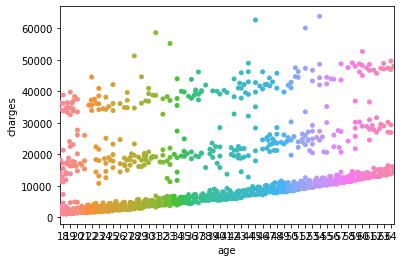

In [ ]:
sns.swarmplot(x='age', y='charges', data=data)

The next step in my analysis was to look at the impact of age on charges. The mean age of the dataset is 39 so I am splitting the data into 2 categories (age<=39 and age>39). 

The younger group contained 674 people while the older group had 664 people. 

Comparing the mean values for both groups, I can see that charges are significantly higher for the older group (16430 vs 10157). Comparing the min and max values, I see that the younger group has a significantly less minimum charge (1121 vs 5415). I can also see that the maximum value is higher for the older group (63770 vs 58571). 

I can also look at the swarmplot above to see there are a few distinct trend lines that exist to describe the data. All three of these trend lines appear to increase slightly as age is increased. 

This leads me to believe that age is a significant factor to determining charges, although due to the multiple trend lines I can tell that there is another variable (presumably smoker) that has a much greater impact on charges.

To conclude this analysis, I can further explore this hypothesis that age combined with other single variables will have a significant impact on charge values. 

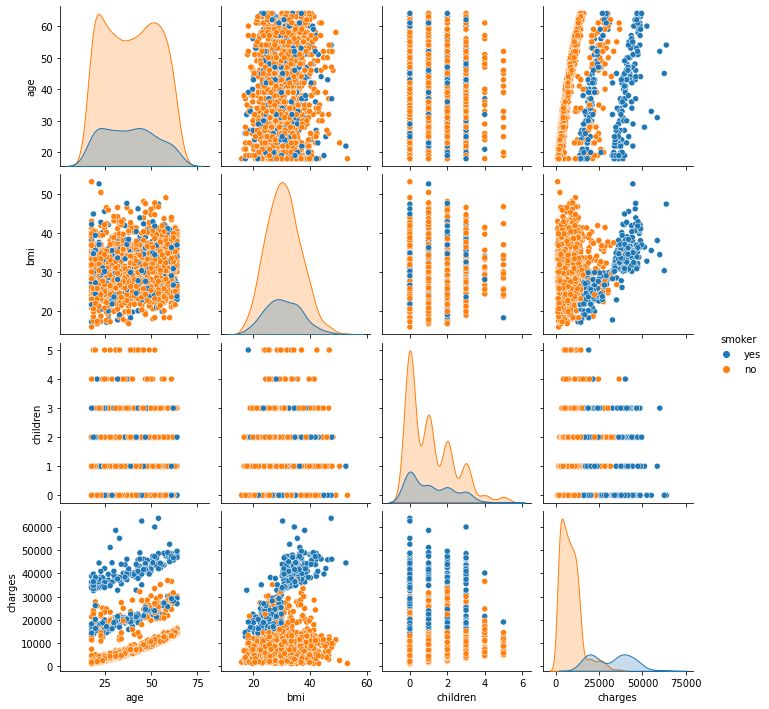

In [ ]:
import seaborn as sns

sns.pairplot(data, hue='smoker')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


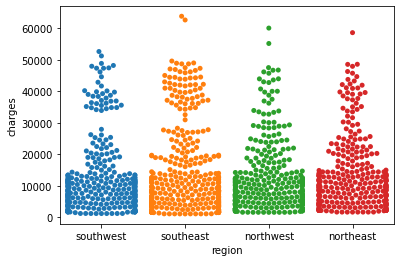

In [ ]:
sns.swarmplot(x='region', y='charges', data=data)